# 4.4 Clustering: K-means, SOM

Clustering és un sistema per trobar grups de dades (*clústers*) amb alguna similitud en comú. Els elements amb característiques similars formaran part del mateix grup o clúster, i estaran separats dels altres clústers amb els que no comparteixen característiques o amb els que no seran tan similars. 

El clustering s'aplica en molts camps: machine learning, data mining, reconeixement de patrons, bioinformàtica, compressió de dades, i segmentació d'imatges, entre d'altres.

Existeixen molts mètodes de clustering, un dels més populars és l'algoritme de K-means.

(Nota: tingueu en compte que el clustering "per sí sol" no és un mètode sinó un objectiu a aconseguir amb un algoritme)

## K-means

K-means és un mètode de clustering amb l'objectiu principal d'agrupar punts de dades similars i descobrir patrons subjacents.  

L'algoritme agrupa un conjunt d'$\begin{equation}n\end{equation}$ punts d'entrada en $\begin{equation}k\end{equation}$ grups/clústers de sortida, de manera que cada punt es classifica dins el clúster que tingui el valor mig més proper a ell.

Per calcular el nivell de semblança entre els punts d'entrada, l'algoritme de K-means utilitza la distància entre ells, la majoria de vegades a través del càlcul de la distància euclidiana, tot i que es poden fer servir altres funcions. 

L'algoritme en sí és simple i segueix aquests passos: 
1. Inicialització de $\begin{equation}k\end{equation}$ centroides: aleatòriament s'escullen $\begin{equation}k\end{equation}$ punts aleatoris per ser els centres del clústers.
2. Assignar a cada punt de dada al centroide més proper: es calcula la distància entre cada centroide i cada punt de dada i s'assigna el punt al centroide més proper.
3. Actualitzar centroides fent la mitja de cada grup. El centroide és el punt per al qual la suma de distàncies entre ell i tots els membres del clúster és mínima.
4. Tornar al punt 2 fins que arribem al criteri de sortida (que pot ser que els centroides no variïn, o bé que haguem arribat a $\begin{equation}x\end{equation}$ nombre d'iteracions).

Al final tindrem $\begin{equation}k\end{equation}$ clústers. I cada clúster vindrà definit pels seus membres i el seu centroide final.  

La principal limitació de l'algoritme és que el nombre de clústers resultants, el valor de la $\begin{equation}k\end{equation}$, no es calcula automàticament sinó que és un paràmetre d'entrada de l'algoritme (li hem de dir nosaltres *quants* clústers ha de buscar).

### Quantificació de colors en imatges
Una aplicació del K-means per imatges és la **quantificació de colors**.

La quantificació de colors és un mètode per reduir el nombre total de colors diferents utilitzats en una imatge. L'objectiu principal és obtenir una imatge comprimida tan similar com sigui possible a la imatge original. El factor clau per aconseguir-ho és escollir aquells colors que representin més a la imatge original.

La manera més típica de quantificar colors és a través d'algun mètode de clustering, on els punts d'entrada són els colors del píxels de la imatge i, de cada clúster resultant s'escull el punt més representatiu. Un cop tinguem això, la compressió es basarà en re-mapejar tots els colors del clúster en el color del punt representatiu del clúster. Anem a veure un exemple interactiu aplicant el mètode de K-means. Us animem a provar diferents valors de $\begin{equation}k\end{equation}$ per aconseguir paletes de colors finals més o menys acurades.

In [12]:
# EXEMPLE PRÀCTIC: Quantificació d'imatges amb K-Means
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

img = cv2.imread('Imatges/home.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# transformem la imatge en un vector de Width*height X 3 
Z = img_rgb.reshape((-1,3))
# la convertim a punt flotant
Z = np.float32(Z)

@interact
def kmeans_quantization(k=range(2, 10)):
    # definim els paràmetres de kmeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # apliquem kmeans
    ret,label,center=cv2.kmeans(Z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    
    # construim una imatge on es substituixen els píxels originals per la mitjana del clúster
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    
    # mostrem resultats
    plt.subplot(2,2,1)
    plt.imshow(img_rgb)

    plt.subplot(2,2,2)
    plt.imshow(res2)
    
    fig = plt.gcf()
    fig.set_size_inches(25.5, 15.5)
    



interactive(children=(Dropdown(description='k', options=(2, 3, 4, 5, 6, 7, 8, 9), value=2), Output()), _dom_cl…

## SOM

Self Organizing Maps (SOM) és un altre mètode de clusterització i reducció de dimensions. S'utilitza més per conjunts de dades amb relacions complexes i no lineals, i la sortida acostuma a mostrar relacions geomètriques simples en una visualització de poques dimensions, normalment 2D.

La idea original per crear l'algoritme de SOM era imitar d'una forma simplificada la capacitat del cervell humà per crear mapes topològics a partir de senyals rebudes de l'exterior. El còrtex té zones on les neurones es troben topològicament ordenades segons el tipus de sensors a què responen. A més a més, la influència que una neurona exerceix sobre les demés està relacionada amb la distància entre elles, sent aquesta influència més gran amb les neurones veïnes més properes.

Un model SOM consta de dues capes de neurones: una capa d'entrada amb $\begin{equation}N\end{equation}$ neurones (una per cada variable d'entrada) i una capa de sortida formada per $\begin{equation}M\end{equation}$ neurones. La capa d'entrada (com els sensors del cos) s'encarrega de rebre i transmetre la informació de l'exterior cap a la capa de sortida, i només pot viatjar la informació en aquesta direcció. La capa de sortida (com les neurones en el cervell) és l'encarregada de processar la informació i formar el mapa de característiques de sortida. Normalment la capa de sortida s'organitza en forma de mapa bidimensionals en forma de graella.

<center>
    <img src="Imatges/kohonen1.gif"><br>
    <i>Arquitectura model SOM (Font: <a href="http://www.lohninger.com/helpcsuite/kohonen_network_-_background_information.htm">Software Development Lohninger </a>)</i>
</center>

Les connexions entre les dues capes que formen la xarxa són sempre cap a endavant, propagant la informació de la capa d'entrada a la capa de sortida. Cada neurona d'entrada $\begin{equation}i\end{equation}$ està connectada amb cadascuna de les neurones $\begin{equation}j\end{equation}$ de sortida mitjançant un pes $\begin{equation}w_{ji}\end{equation}$. D'aquesta manera les neurones de sortida tenen associat un vector de pesos $\begin{equation}W_j\end{equation}$ anomenat *codebook* o vector de referència, ja que és el vector mitjana de la categoria representada per la neurona de sortida $\begin{equation}j\end{equation}$. D'aquesta manera, el SOM defineix una projecció des d'un espai de dades d'alta dimensió a un mapa bidimensional de neurones.

El sistema d'entrenament utilitza un aprenentatge competitiu, per cada neurona d'entrada, totes les neurones de sortida competeix amb les seves veïnes per trobar la més similar a l'entrada. O, en altres paraules, les neurones de sortida competeixen per decidir quina respondrà o serà activada a la neurona de la capa d'entrada. Un cop es troba la guanyadora, els pesos es recalculen per apropar la neurona guanyadora al punt d'entrada, i en conseqüència les neurones de sortida veïnes també es  mouen en la mateixa direcció. La graella inicial poc a poc, en cada iteració de l'algoritme, va adaptant-se a la morfologia de les dades d'entrada.

<center>
    <img src="Imatges/220px-TrainSOM.gif"><br>
    <i>Procés d’entrenament de SOM sobre conjunt de dades bidimensionals (Font: <a href="https://en.wikipedia.org/wiki/Self-organizing_map">Wikipedia </a>)</i>
</center>
    
Els passos de l'algoritme són senzills, tot i que impliquen un alt nombre d'iteracions:
1. Inicialitzar els pesos de la xarxa neuronal (pesos aleatoris).
2. Escollir una entrada aleatòriament.
3. Escollir la neurona guanyadora utilitzant la distància euclidiana.
4. Actualitzar els pesos de les neurones.
5. Tornar al punt 2 fins que la xarxa no variï.

Com en seccions anteriors, no entrarem en l'explicació de les fórmules aplicades per realitzar els càlculs, OpenCV ja té funcions que els implementen, aquí només ens centrarem en un exemple pràctic per aprendre colors d'una imatge.




entrenant xarxa 3x3 ...
 [ 500 / 500 ] 100% - 5450.84 it/s - 0:00:00 left  - quantization error: 25.63678986922534
quantization...
building new image...
done.


<Figure size 432x288 with 0 Axes>

Text(0.5,1,'original')

Text(0.5,1,'result')

Text(0.5,1,'initial colors')

Text(0.5,1,'learned colors')

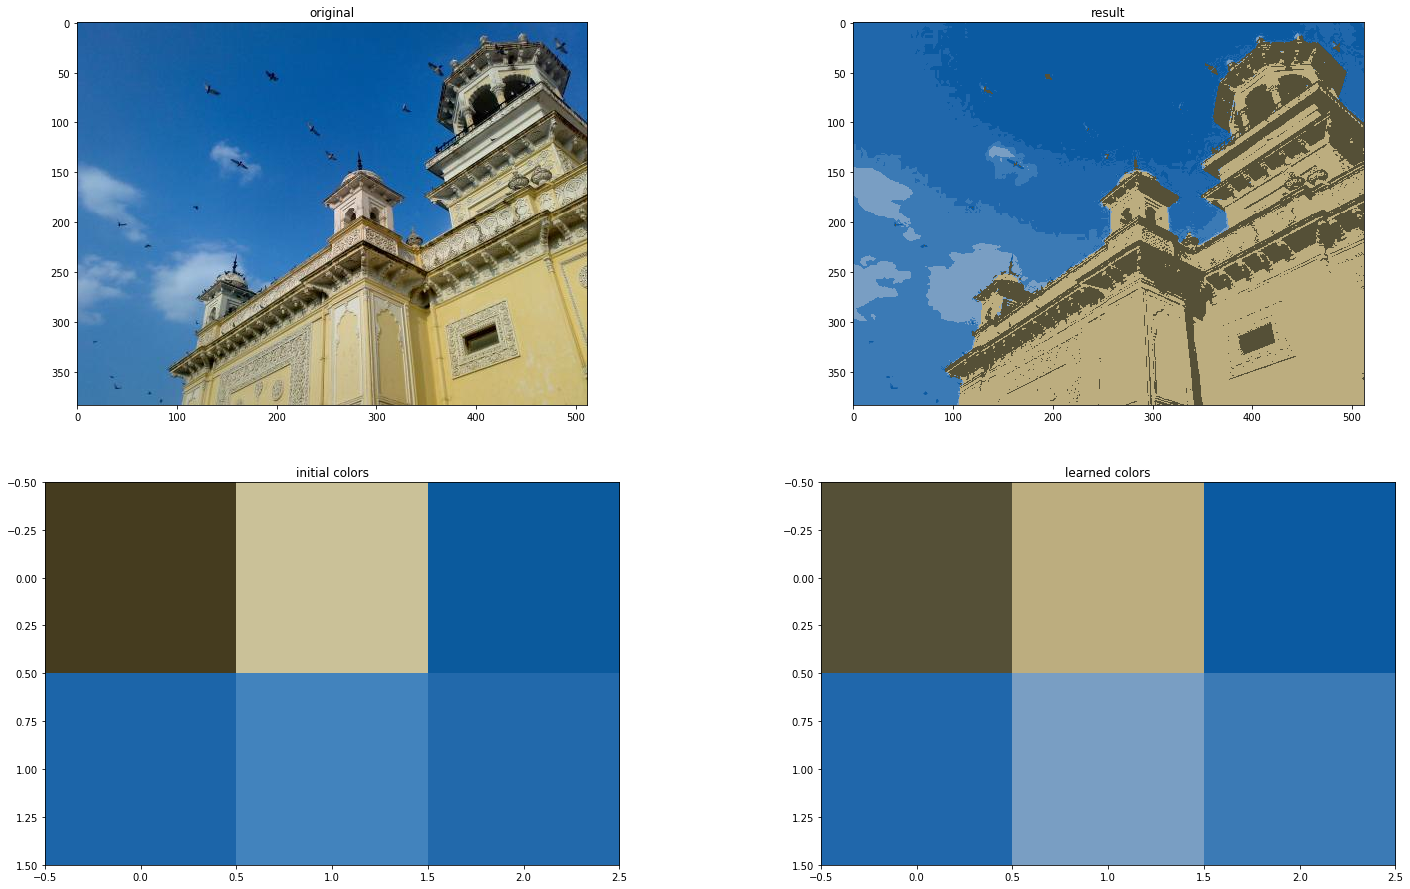

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Per a que funcioni això, obrir un terminal i fer pip install minisom (només cal el primer cop)
from minisom import MiniSom

img = cv2.imread('Imatges/home.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixels = img_rgb.reshape(-1,3)

print('entrenant xarxa 3x3 ...')
som = MiniSom(2, 3, 3, sigma=1., learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 500, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure()
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img_rgb)
plt.subplot(2,2,2)
plt.title('result')

plt.imshow(np.uint8(clustered))


plt.subplot(2,2,3)
plt.title('initial colors')
plt.imshow(np.uint8(starting_weights), interpolation='none')
plt.subplot(2,2,4)
plt.title('learned colors')
plt.imshow(np.uint8(som.get_weights()), interpolation='none')


fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
plt.show()


## Referències

1. K-Means
 - K-Means Clustering: From A to Z; Azika Amelia: [https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)
 - Determination of Number of Clusters in K-Means Clustering and
Application in Colour Image Segmentation ;Siddheswar Ray and Rose H. Turi: [http://users.monash.edu/~roset/papers/cal99.pdf](http://users.monash.edu/~roset/papers/cal99.pdf)
 - Understanding K-means Clustering in Machine Learning; Dr. Michael J. Garbade: [https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)
 - Color quantization using k-means; Lou Marvin Caraig: [https://lmcaraig.com/color-quantization-using-k-means](https://lmcaraig.com/color-quantization-using-k-means)

2. SOM
 - Discovering SOM, an Unsupervised Neural Network; Gisely Alves: [https://medium.com/neuronio/discovering-som-an-unsupervised-neural-network-12e787f38f9](https://medium.com/neuronio/discovering-som-an-unsupervised-neural-network-12e787f38f9)
 - Introduction to Self-Organizing Maps (SOMs); Derrick Mwiti: [https://heartbeat.fritz.ai/introduction-to-self-organizing-maps-soms-98e88b568f5d](https://heartbeat.fritz.ai/introduction-to-self-organizing-maps-soms-98e88b568f5d)
 - GitHub Minisom; MiniSom is a minimalistic implementation of the Self Organizing Maps: [https://github.com/JustGlowing/minisom](https://github.com/JustGlowing/minisom)
